### Suggested talking points:
- The data set.
- The question you asked.
- The part of the data you analyzed.
- Some analysis you've tried.
- You're visualizations.
- Conclusions for your research.

In [25]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import numpy as np
import seaborn as sns

In [3]:
def plot_bar(x,y, h=False, xlim=None, figsize=None,xlabel=None, ylabel = None, title=None):
    if figsize: plt.figure(figsize=figsize)
    else: plt.figure(figsize=(8,8))

    if h: plt.barh(x,y)
    else: plt.bar(x,y)
    
    if xlim: plt.xlim(xlim)
    if xlabel: plt.xlabel(xlabel, size=12, weight='bold')
    if ylabel: plt.ylabel(ylabel, size=12, weight='bold')
    if title: plt.title(title, size=14, weight='bold')

In [4]:
#average amt_spent
def print_customers(df, col, low_cutoff, super_cutoff, rtn=False, id_col='name'):
    avg_spent = df[col].mean()
    low_spenders = sorted(list(df[df[col]<low_cutoff][id_col]))
    medium_spenders = sorted(list(df[df[col].between(low_cutoff,avg_spent)][id_col]))
    high_spenders = sorted(list(df[df[col].between(avg_spent,super_cutoff)][id_col]))
    super_spenders = sorted(list(df[df[col]>super_cutoff][id_col]))
    if not rtn:
        print('Low: ', len(low_spenders))
        print(low_spenders)
        print()
        print('medium: ', len(medium_spenders))
        print(medium_spenders)
        print()
        print('high: ', len(high_spenders))
        print(high_spenders)
        print()
        print('super spenders: ', len(super_spenders))
        print()
        print(super_spenders)
    if rtn: return low_spenders, medium_spenders, high_spenders, super_spenders


# DEMO: 3 ways to plot the same thing - pick your favorite!

### matplotlib
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot

Text(0, 0.5, 'length')

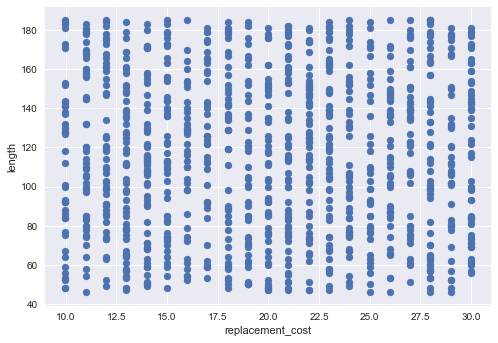

In [34]:
# import matplotlib.pyplot as plt
# import pandas as pd
# movies = pd.read_csv('film_and_category.csv')
x = movies['replacement_cost'] # create a list of x values from the dataframe column
y = movies['length'] # create a list of y values from the dataframe column
plt.scatter(x,y) # plot x vs y
plt.xlabel('replacement_cost') # tell matplotlib the name of the x-axis
plt.ylabel('length') # tell matplotlib the name of the y-axis

### pandas
https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

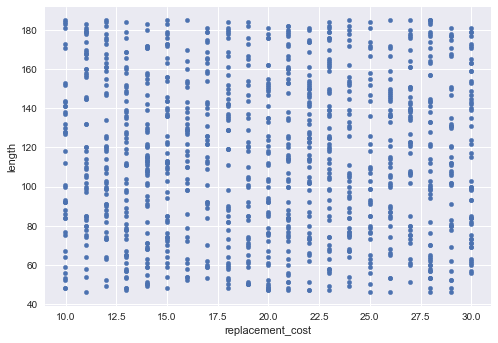

In [32]:
# import pandas as pd
# movies = pd.read_csv('film_and_category.csv')
movies.plot('replacement_cost','length', kind='scatter')
# notice how the first parameter is the x values, and is given by the column name in the dataframe
# likewise, the second paramter is y, same format
# and *kind* is the type of plot you want

### seaborn
https://seaborn.pydata.org/api.html

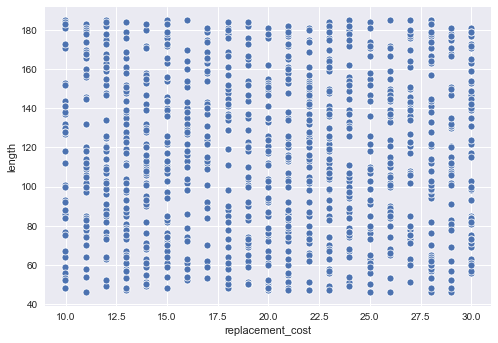

In [30]:
# import pandas as pd
# import seaborn as sns
# movies = pd.read_csv('film_and_category.csv')
sns.scatterplot(x='replacement_cost', y='length', data=movies) 
# notice you x and y are defined by column names in dataframe passed to the *data* parameter

# <br><br><br><br><br><br><br> Simple project example
# Most Expensive Movies to Rent - by Rating

In [5]:
movies = pd.read_csv('film_and_category.csv')
movies.head()

,category_id,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,last_update,special_features,fulltext,last_update.1,name,last_update.2
0,6,1,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,2013-05-26 14:50:58.951,"{""Deleted Scenes"",""Behind the Scenes""}",'academi':1 'battl':15 'canadian':20 'dinosaur...,2006-02-15 10:07:09,Documentary,2006-02-15 09:46:27
1,11,2,Ace Goldfinger,A Astounding Epistle of a Database Administrat...,2006,1,3,4.99,48,12.99,G,2013-05-26 14:50:58.951,"{Trailers,""Deleted Scenes""}",'ace':1 'administr':9 'ancient':19 'astound':4...,2006-02-15 10:07:09,Horror,2006-02-15 09:46:27
2,6,3,Adaptation Holes,A Astounding Reflection of a Lumberjack And a ...,2006,1,7,2.99,50,18.99,NC-17,2013-05-26 14:50:58.951,"{Trailers,""Deleted Scenes""}",'adapt':1 'astound':4 'baloon':19 'car':11 'fa...,2006-02-15 10:07:09,Documentary,2006-02-15 09:46:27
3,11,4,Affair Prejudice,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,5,2.99,117,26.99,G,2013-05-26 14:50:58.951,"{Commentaries,""Behind the Scenes""}",'affair':1 'chase':14 'documentari':5 'fanci':...,2006-02-15 10:07:09,Horror,2006-02-15 09:46:27
4,8,5,African Egg,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,6,2.99,130,22.99,G,2013-05-26 14:50:58.951,"{""Deleted Scenes""}",'african':1 'chef':11 'dentist':14 'documentar...,2006-02-15 10:07:09,Family,2006-02-15 09:46:27


In [8]:
groups = 'rating'

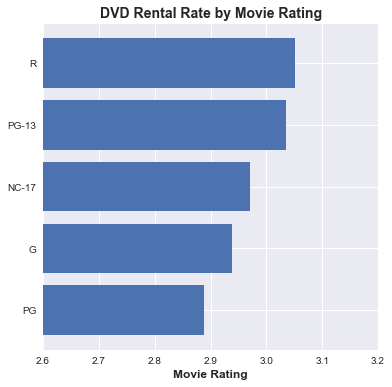

In [9]:
rental_rate_by_rating = movies.groupby(groups)['rental_rate'].mean().sort_values()

#Custom plot function, see top
plot_bar(movies[groups].unique(), rental_rate_by_rating, 
         h=True, xlim=(2.6,3.2), figsize=(6,6),
         xlabel='Movie Rating', title='DVD Rental Rate by Movie Rating')

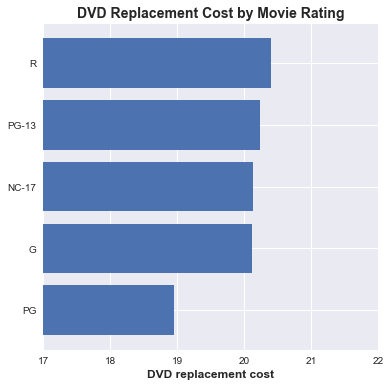

In [10]:
replacement_by_rating = movies.groupby(groups)['replacement_cost'].mean().sort_values()

#Custom plot function, see top
plot_bar(movies[groups].unique(), replacement_by_rating, 
         h=True, xlim=(17,22), figsize=(6,6),
         xlabel='DVD replacement cost', title='DVD Replacement Cost by Movie Rating')

# Most Expensive Movies - by Category

In [11]:
groups = 'name'

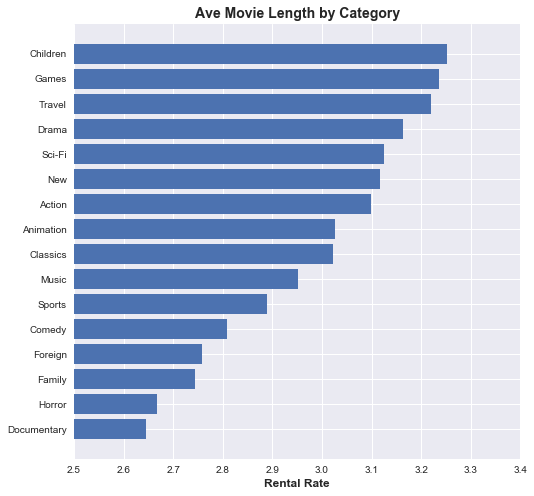

In [12]:
rental_rate_by_rating = movies.groupby(groups)['rental_rate'].mean().sort_values()

#Custom plot function, see top
plot_bar(movies[groups].unique(), rental_rate_by_rating, 
         h=True, xlim=(2.5,3.4),
         xlabel='Rental Rate', title='Ave Movie Length by Category')

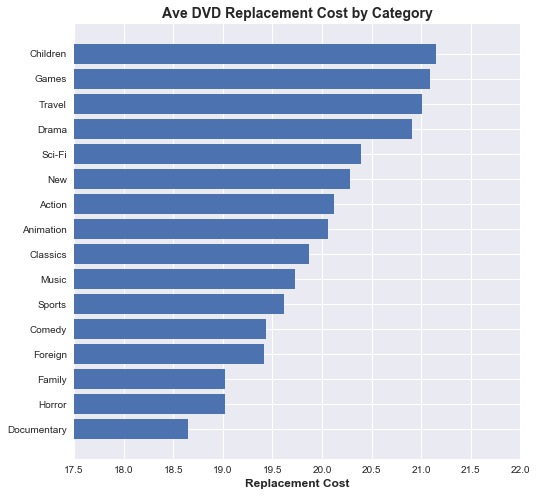

In [13]:
replacement_by_rating = movies.groupby(groups)['replacement_cost'].mean().sort_values()

#Custom plot function, see top
plot_bar(movies[groups].unique(), replacement_by_rating, 
         h=True, xlim=(17.5,22),
         xlabel='Replacement Cost', title='Ave DVD Replacement Cost by Category')

# Movie Length - by Rating

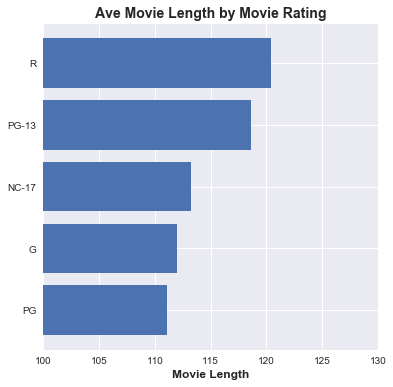

In [14]:
groups = 'rating'
length_by_rating = movies.groupby(groups)['length'].mean().sort_values()

#Custom plot function, see top
plot_bar(movies[groups].unique(), length_by_rating, 
         h=True, xlim=(100,130), figsize=(6,6),
         xlabel='Movie Length', title='Ave Movie Length by Movie Rating')

# Movie Length - by Category

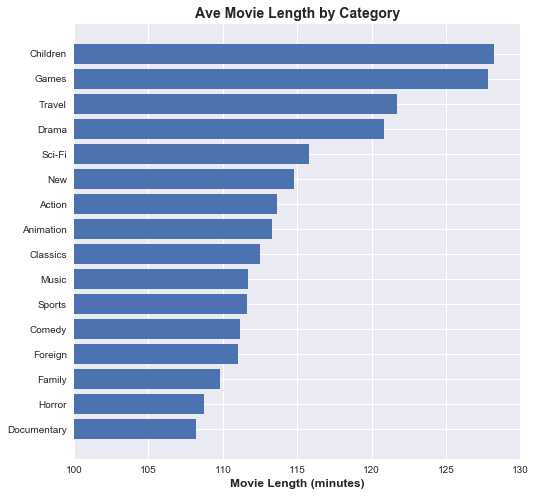

In [15]:
groups = 'name'
length_by_rating = movies.groupby(groups)['length'].mean().sort_values()

#Custom plot function, see top
plot_bar(movies[groups].unique(), length_by_rating, 
         h=True, xlim=(100,130),
         xlabel='Movie Length (minutes)', title='Ave Movie Length by Category')


# <br><br><br><br><br><br> Elaborate Example
# Market Segmentation

## (More SQL / Less pandas)

CREATE OR REPLACE VIEW base_table AS (
    SELECT
        c.customer_id,
        SUM(p.amount) as total_spent,
        COUNT(p.payment_id) as total_transactions,
        c.first_name ||' '||c.last_name as full_name,
        c.email,
        MIN(r.rental_date),
        (SELECT MAX(rental_date) FROM rental) - MIN(r.rental_date) as customer_age
    FROM customer as c
        JOIN payment as p USING(customer_id)
        JOIN rental as r USING(rental_id)
        JOIN inventory as i USING(inventory_id)
    GROUP BY c.customer_id);

COPY (
	SELECT *, 
		total_spent/total_transactions AS average_purchase,
		(EXTRACT(epoch FROM customer_age)/3600/24/30.5) AS months_active,
		total_transactions/(EXTRACT(epoch FROM customer_age)/3600/24/30.5) AS transactions_per_month,
		total_spent/(EXTRACT(epoch FROM customer_age)/3600/24/30.5) AS spent_per_month
	FROM base_table
	) TO '/tmp/customer.csv' DELIMITER ',' CSV HEADER;

In [16]:
per_customer = pd.read_csv('customer_data.csv')
per_customer.head()

,customer_id,total_spent,total_transactions,full_name,email,min,customer_age,average_purchase,months_active,transactions_per_month,spent_per_month
0,184,80.80,20,Vivian Ruiz,vivian.ruiz@sakilacustomer.org,2005-06-17 09:38:08,242 days 05:37:55,4.040000,7.942120,2.518219,10.173606
1,87,137.72,28,Wanda Patterson,wanda.patterson@sakilacustomer.org,2005-06-16 04:12:25,243 days 11:03:38,4.918571,7.982323,3.507751,17.253123
2,477,106.79,21,Dan Paine,dan.paine@sakilacustomer.org,2005-06-16 14:29:59,243 days 00:46:04,5.085238,7.968262,2.635456,13.401919
3,273,130.72,28,Priscilla Lowe,priscilla.lowe@sakilacustomer.org,2005-07-06 02:46:13,223 days 12:29:50,4.668571,7.328548,3.820675,17.837094
4,550,151.69,31,Guy Brownlee,guy.brownlee@sakilacustomer.org,2005-06-15 04:18:37,244 days 10:57:26,4.893226,8.014969,3.867763,18.925838


## (Less SQL / More pandas version)

COPY (
	SELECT
	*
    FROM customer as c
        JOIN payment as p USING(customer_id)
        JOIN rental as r USING(rental_id)
        JOIN inventory as i USING(inventory_id)
    GROUP BY c.customer_id
	) TO '/tmp/customers.csv' DELIMITER ',' CSV HEADER;

In [ ]:
customers = pd.read_csv('customers.csv')

In [35]:
customers['full_name'] = customers['first_name'] + ' ' + customers['last_name'] # first and last name to one column


# get total amount spent per customer
spent_per_customer = pd.DataFrame(customers.groupby('customer_id').sum())['amount']
# get total number of transactions per customer
transactions_per_customer = pd.DataFrame(customers.groupby('customer_id').count().iloc[:,0])
# get list of full names for all customers
customer_names = pd.DataFrame(customers.groupby('customer_id').min())['full_name']
# get list of all email addresses
emails = pd.DataFrame(customers.groupby('customer_id').min())['email']

# create a dataframe that is 1 row per customer, using the above lists/series'
per_customer = pd.DataFrame()
per_customer['spent'] = spent_per_customer # add total amount spent per customer
per_customer['transactions'] = transactions_per_customer # add total transactions per customer
per_customer['name'] = customer_names # add full names
per_customer['average_amt'] = per_customer['spent']/per_customer['transactions'] # compute average transaction value
per_customer['email'] = emails # add emails

# get the date each customer first became active - earliest rental date
customer_start_dates = customers.groupby('customer_id').min()[['full_name', 'rental_date']]
per_customer['start_date'] = customer_start_dates['rental_date']

# get a number that represents todays date - the most recent rental date in the dataframe
today = pd.to_datetime(customers.max()['rental_date'])
# compute how long each customer has been active - *today* - earliest rental date
per_customer['months_active'] = (today - pd.to_datetime(per_customer['start_date']))
per_customer['months_active'] = per_customer['months_active'].apply(lambda x: float(x.days)/365*12) #convert date-interval to number of months
per_customer['spent_per_month'] = per_customer['spent']/per_customer['months_active'] #compute average amt spent per month per customer
per_customer['transactions_per_month'] = per_customer['transactions']/per_customer['months_active']# compute average amt of transctions per custoemr per month

NameError: name 'customers' is not defined

# Customers Expenditures per month (over lifetime)

# How long have our customers been active?

Text(0, 0.5, '# customers')

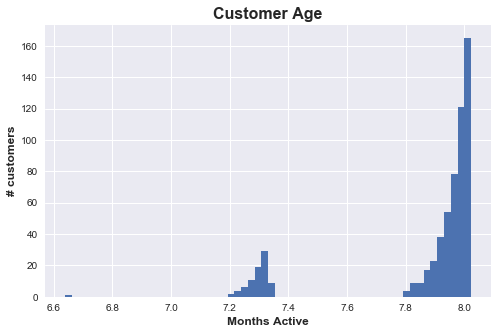

In [37]:
plt.figure(figsize=(8,5))
per_customer['months_active'].hist(bins=60) 
plt.title('Customer Age', size=16, weight='bold')
plt.xlabel('Months Active',size=12, weight='bold')
plt.ylabel('# customers', size=12, weight='bold')

In [ ]:
x_label = '<-----599 customer----->'

Text(578, 25, 'super (~25)')

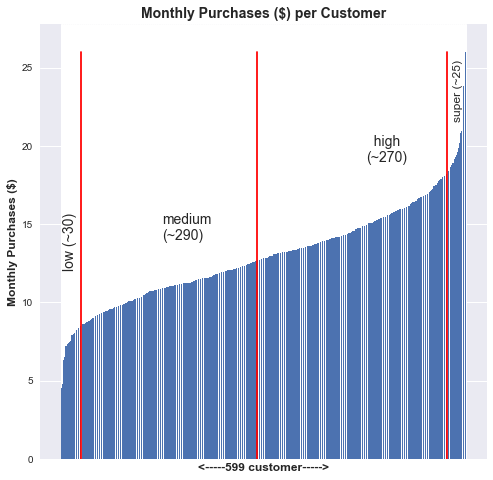

In [19]:
ids = list(per_customer.sort_values('spent_per_month').index.astype(str))
monthly_spent = list(per_customer['spent_per_month'].sort_values())

#Custom plot function, see top
plot_bar(ids, monthly_spent,
         xlabel=x_label, ylabel = 'Monthly Purchases ($)', title='Monthly Purchases ($) per Customer')

plt.tick_params(axis='x', labelbottom=False) #remove x axis tick marks
plt.plot([30,30],[0,26], c='r') # plot a vertical bar - red
plt.plot([290,290],[0,26], c='r') # plot a vertical bar - red
plt.plot([570,570],[0,26], c='r') # plot a vertical bar - red
plt.text(3,15,'low (~30)', size=14, rotation=90) # plot text
plt.text(150,15,'medium', size=14) # plot text
plt.text(150,14,'(~290)', size=14) # plot text
plt.text(450,20,'  high', size=14) # plot text
plt.text(450,19,'(~270)', size=14) # plot text
plt.text(578,25,'super (~25)', rotation=90, size=12) # plot text

#NOTE that coordinates are all in units of the graph (eg 0-600 on x-axis, 0-25 on y-axis), 
# and changes by what you're plottting!

# Customers in each segment

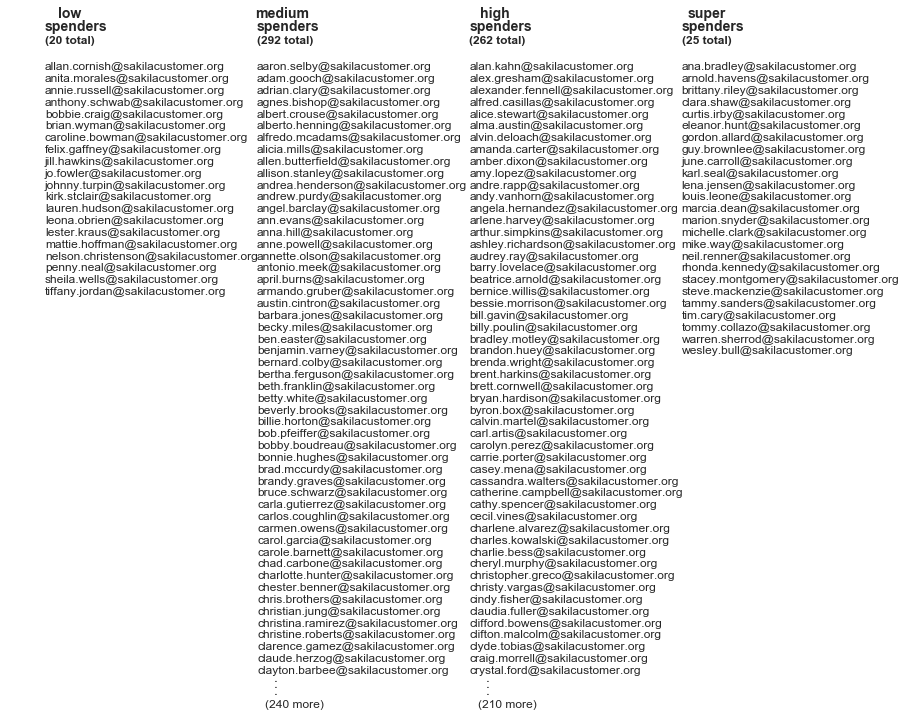

In [20]:
# custom plot function, see top 
l, m, h, s = print_customers(per_customer, 'spent_per_month', 8,18.5, rtn=True, id_col = 'email')
customer_segments = [l,m,h,s]
titles = ['low', 'medium','high','super']
counts = [len(x) for x in customer_segments]
fig, ax = plt.subplots(1,4, figsize=(12,10))
for i, lst in enumerate(customer_segments):
    y = .93
    ax[i].set_title(titles[i], weight='bold', size=14)
    ax[i].text(0.2, .99, 'spenders', weight='bold', size=14)
    ax[i].text(0.2, .97, '({} total)'.format(len(lst)), weight='bold', size=12)
    ax[i].axis('off')
    for name in lst:
        if y>0: 
            ax[i].text(0.2, y, name, size=12)
            y -= .018
        else:
            ax[i].text(0.4,0,'.', size=14)
            ax[i].text(0.4,-0.01,'.', size=14)
            ax[i].text(0.4,-0.02,'.', size=14)
            current_posn = lst.index(name)
            num_left = len(lst) - current_posn
            ax[i].text(0.3,-0.04,'({} more)'.format(num_left), size=12)
            break
            
plt.tight_layout()

# <br> Customers *transactions* per month (over lifetime)

In [21]:
per_customer.columns

Index(['customer_id', 'total_spent', 'total_transactions', 'full_name',
       'email', 'min', 'customer_age', 'average_purchase', 'months_active',
       'transactions_per_month', 'spent_per_month'],
      dtype='object')

Text(578, 5.4, 'super (~25)')

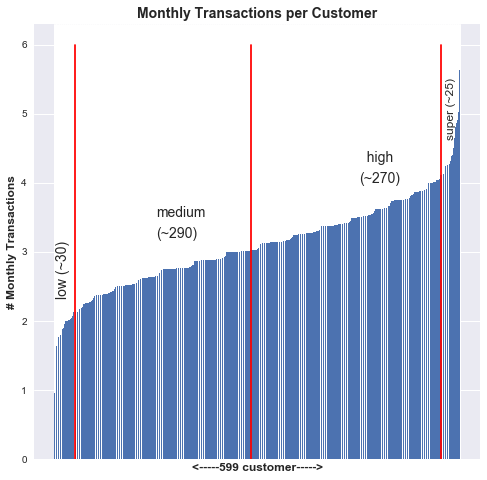

In [22]:
ids = list(per_customer.sort_values('transactions_per_month').index.astype(str))
monthly_transactions = list(per_customer['transactions_per_month'].sort_values())

#Custom plot function, see top
plot_bar(ids, monthly_transactions,
         xlabel=x_label, ylabel = '# Monthly Transactions', title='Monthly Transactions per Customer')
plt.tick_params(axis='x', labelbottom=False)
plt.plot([30,30],[0,6], c='r')
plt.plot([290,290],[0,6], c='r')
plt.plot([570,570],[0,6], c='r')
plt.text(3,3,'low (~30)', size=14, rotation=90)
plt.text(150,3.5,'medium', size=14)
plt.text(150,3.2,'(~290)', size=14)
plt.text(450,4.3,'  high', size=14)
plt.text(450,4,'(~270)', size=14)
plt.text(578,5.4,'super (~25)', rotation=90, size=12)

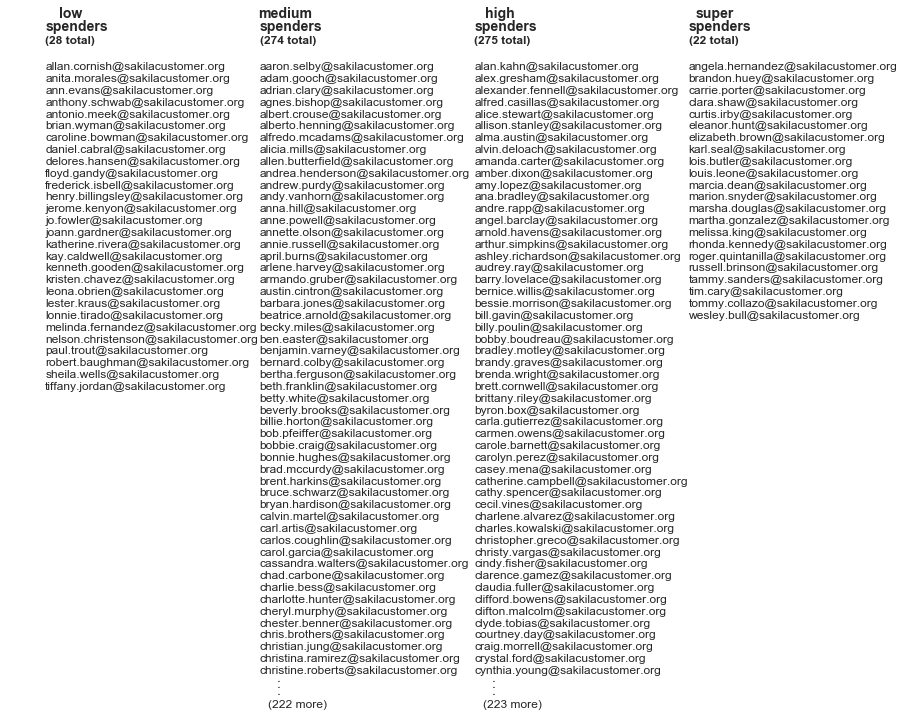

In [23]:
# custom plot function, see top 
l, m, h, s = print_customers(per_customer, 'transactions_per_month', 2.1,4.2, rtn=True, id_col = 'email')
customer_segments = [l,m,h,s]
titles = ['low', 'medium','high','super']
counts = [len(x) for x in customer_segments]
fig, ax = plt.subplots(1,4, figsize=(12,10))
for i, lst in enumerate(customer_segments):
    y = .93
    ax[i].set_title(titles[i], weight='bold', size=14)
    ax[i].text(0.2, .99, 'spenders', weight='bold', size=14)
    ax[i].text(0.2, .97, '({} total)'.format(len(lst)), weight='bold', size=12)
    ax[i].axis('off')
    for name in lst:
        if y>0: 
            ax[i].text(0.2, y, name, size=12)
            y -= .018
        else:
            ax[i].text(0.4,0,'.', size=14)
            ax[i].text(0.4,-0.01,'.', size=14)
            ax[i].text(0.4,-0.02,'.', size=14)
            current_posn = lst.index(name)
            num_left = len(lst) - current_posn
            ax[i].text(0.3,-0.04,'({} more)'.format(num_left), size=12)
            break
            
plt.tight_layout()